In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as lb
import librosa.display as  ldisplay
from IPython.display import Audio

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D,MaxPooling1D,Flatten, Dropout, BatchNormalization
from keras import Input
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.utils import np_utils
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
first_data="/content/drive/MyDrive/Datasets/speech-emotion-recognition-ravdess-data"

In [ ]:
actors=os.listdir(first_data)
filepath=[]
emotion=[]
for x in actors:
  audiofiles=os.listdir(first_data +'/'+ x)
  for y in audiofiles:
    left=y.split('.')
    left=left[0]
    left=left.split('-')
    left=int(left[2])
    emotion.append(left)
    filepath.append(first_data+'/'+x+'/'+y)

dataset1=pd.DataFrame(emotion,columns =['Emotions'])
dataset2=pd.DataFrame(filepath,columns=['Path'])
dataset=pd.concat([dataset1, dataset2],axis=1)
dataset.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

In [ ]:
dataset.head()

,Emotions,Path
0,angry,/content/drive/MyDrive/Datasets/speech-emotion...
1,surprise,/content/drive/MyDrive/Datasets/speech-emotion...
2,surprise,/content/drive/MyDrive/Datasets/speech-emotion...
3,sad,/content/drive/MyDrive/Datasets/speech-emotion...
4,fear,/content/drive/MyDrive/Datasets/speech-emotion...


In [ ]:
len(filepath)

1450

In [ ]:
dataset2="/content/drive/MyDrive/Datasets/AudioWAV"

In [ ]:
file1=os.listdir(dataset2)
savefile1=[]
emo=[]
for p in file1:
  left=p.split('.')
  t=left[0]
  t=t.split('_')
  t=t[2]
  emo.append(t)
  savefile1.append(dataset2 + '/'+p)

dataframe1=pd.DataFrame(emo ,columns =['Emotions'])
dataframe2=pd.DataFrame(savefile1, columns =['Path'])
dataframe=pd.concat([dataframe1, dataframe2],axis=1)
dataframe.Emotions.replace({'NEU':'neutral','HAP':'happy','SAD':'sad', 'ANG':'angry', 'FEA':'fear', 'DIS':'disgust'}, inplace=True)

In [ ]:
dataset3="/content/drive/MyDrive/Datasets/Dataset"
file2=os.listdir(dataset3)
savefile2=[]
emot=[]
for p in file2:
  left=p.split('.')
  t=left[0]
  t=t.split('_')
  t=t[2]
  emot.append(t)
  savefile2.append(dataset3+'/'+p)

dataframe3=pd.DataFrame(emot,columns=['Emotions'])
dataframe4=pd.DataFrame(savefile2,columns=['Path'])
dataframe5=pd.concat([dataframe3,dataframe4],axis=1)
dataframe5.Emotions.replace({'neutral':'neutral','happy':'happy','sad':'sad', 'angry':'angry', 'fear':'fear', 'disgust':'disgust'}, inplace=True)  

In [ ]:
len(savefile2)

2800

In [ ]:
dataframe5.head()

,Emotions,Path
0,fear,/content/drive/MyDrive/Datasets/Dataset/OAF_li...
1,disgust,/content/drive/MyDrive/Datasets/Dataset/YAF_ca...
2,ps,/content/drive/MyDrive/Datasets/Dataset/OAF_ga...
3,ps,/content/drive/MyDrive/Datasets/Dataset/YAF_be...
4,neutral,/content/drive/MyDrive/Datasets/Dataset/YAF_pe...


In [ ]:
final_data=pd.concat([dataset,dataframe],axis=0)
final_data=pd.concat([final_data,dataframe5],axis=0)

In [ ]:
final_data.shape

(11692, 2)

Text(0.5, 1.0, 'Number of audio files for each Emotion')

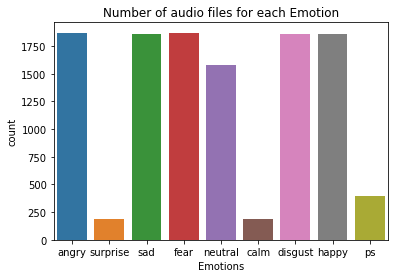

In [ ]:
sns.countplot(x='Emotions',data= final_data)
plt.title('Number of audio files for each Emotion')

In [ ]:
final_data.drop(final_data.index[(final_data["Emotions"]=="surprise")],axis=0,inplace=True)
final_data.drop(final_data.index[(final_data["Emotions"]=="calm")],axis=0,inplace=True)
final_data.drop(final_data.index[(final_data["Emotions"]=="ps")],axis=0,inplace=True)

Text(0.5, 1.0, 'Number of audio files for each Emotion')

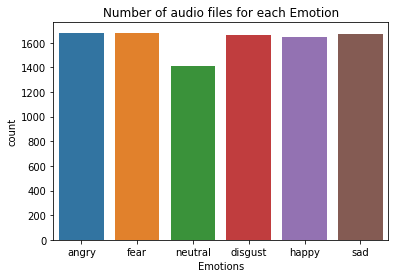

In [ ]:
sns.countplot(x='Emotions',data= final_data)
plt.title('Number of audio files for each Emotion')

In [ ]:
print(final_data.shape)
final_data.to_csv('ser_data.csv',index=False)

(9742, 2)


In [ ]:
def audio_waveplot(data,sampling,emot):
  plt.figure(figsize=[7,3])
  plt.title("Waveplot for {} Emotion".format(emot))
  ldisplay.waveplot(data,sampling)
  plt.plot()

In [ ]:
def spectrogram(data,sampling,emot):
  #plt.title("{} ".format(emot))
  stft_t=lb.stft(data)
  stft_db=lb.amplitude_to_db(stft_t)
  plt.figure(figsize=[8,4])
  plt.title("Spectrogram for {} Emotion".format(emot))
  ldisplay.specshow(stft_db,sr=sampling)
  plt.plot()

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


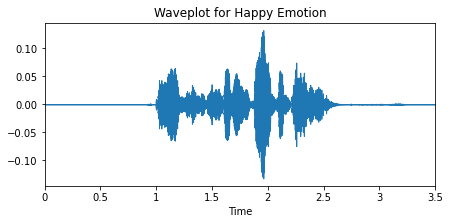

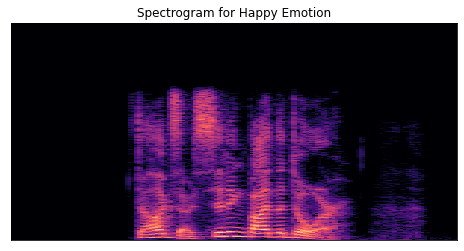

In [ ]:
data_path=np.array(final_data.Path[final_data.Emotions=='happy'])[0]
data,sampling=lb.load(data_path)
audio_waveplot(data,sampling,'Happy')
spectrogram(data,sampling,'Happy')
Audio(data_path)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


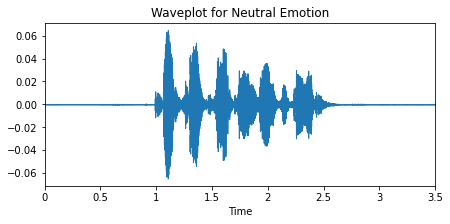

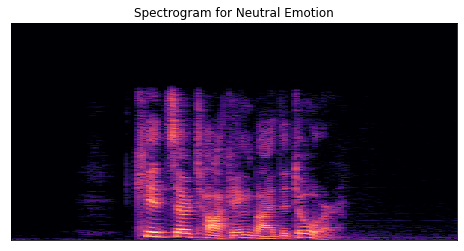

In [ ]:
data_path=np.array(final_data.Path[final_data.Emotions=='neutral'])[0]
data,sampling=lb.load(data_path)
audio_waveplot(data,sampling,'Neutral')
spectrogram(data,sampling,'Neutral')
Audio(data_path)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


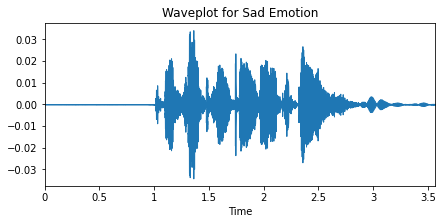

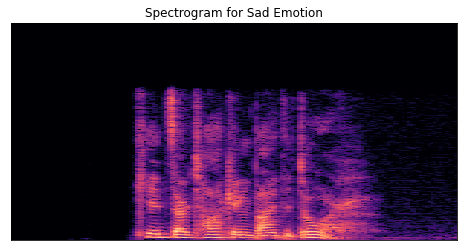

In [ ]:
data_path=np.array(final_data.Path[final_data.Emotions=='sad'])[0]
data,sampling=lb.load(data_path)
audio_waveplot(data,sampling,'Sad')
spectrogram(data,sampling,'Sad')
Audio(data_path)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


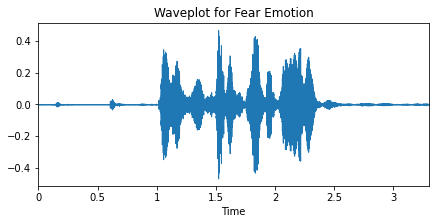

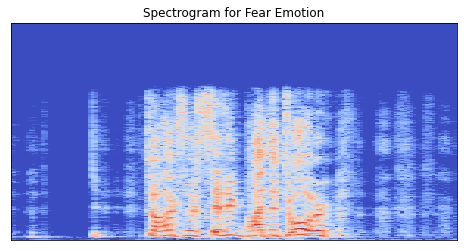

In [ ]:
data_path=np.array(final_data.Path[final_data.Emotions=='fear'])[0]
data,sampling=lb.load(data_path)
audio_waveplot(data,sampling,'Fear')
spectrogram(data,sampling,'Fear')
Audio(data_path)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


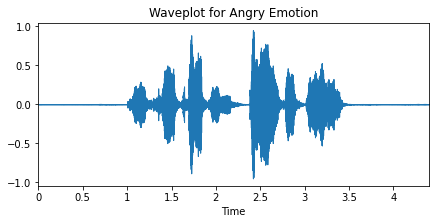

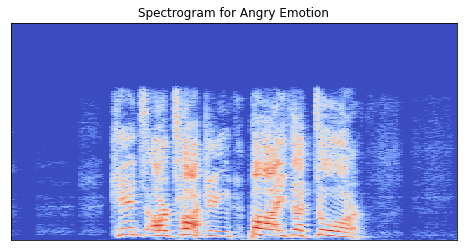

In [ ]:
data_path=np.array(final_data.Path[final_data.Emotions=='angry'])[0]
data,sampling=lb.load(data_path)
audio_waveplot(data,sampling,'Angry')
spectrogram(data,sampling,'Angry')
Audio(data_path)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


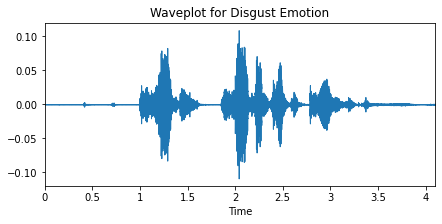

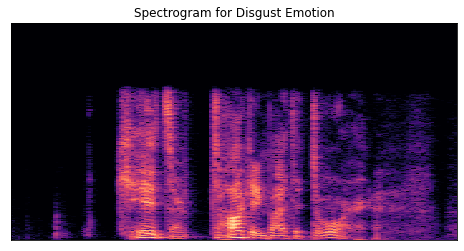

In [ ]:
data_path=np.array(final_data.Path[final_data.Emotions=='disgust'])[0]
data,sampling=lb.load(data_path)
audio_waveplot(data,sampling,'Disgust')
spectrogram(data,sampling,'Disgust')
Audio(data_path)

In [ ]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data


def pitch(data, sampling_rate, pitch_factor=0.7, random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return lb.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [ ]:
def feature_extraction(data):
  result=[]
  zcr=lb.feature.zero_crossing_rate(data, frame_length=2048, hop_length=512)
  zcr=np.squeeze(zcr)
  result=np.hstack((result,zcr))

  mfcc=lb.feature.mfcc(data,sr= 22050,n_fft=2048,hop_length=512).T
  mfcc=mfcc.flatten()
  mfcc=np.squeeze(mfcc)
  result=np.hstack((result,mfcc))

  return result

  #stft=np.abs(lb.stft(data))
  #cstft=lb.feature.chroma_stft(S=stft,sr= 22050,n_fft=2048,hop_length=512).T
  #cstft=cstft.flatten()
  #cstft=np.squeeze(cstft)
  #result=np.hstack((result,cstft))
  
  #rms=lb.feature.rms(data,frame_length=2048, hop_length=512)
  #rms=np.squeeze(rms)
  #result=np.hstack((result,rms))
   # data with noise
def argumentation(data):
  result=feature_extraction(data)

  noise_data = noise(data, random=True)
  res2 = feature_extraction(noise_data)
  result = np.vstack((result, res2)) 

    
  pitched_data = pitch(data, 22050, random=True)
  res3 = feature_extraction(pitched_data)
  result = np.vstack((result, res3)) 

    
  new_data = pitch(data, 22050, random=True)
  data_noise_pitch = noise(new_data, random=True)
  res3 = feature_extraction(data_noise_pitch)
  result = np.vstack((result, res3)) 

  return result

In [ ]:
features_set=[]
feature_emotion=[]
count=1
for path, emotion, ind in zip(final_data.Path, final_data.Emotions, range(final_data.Path.shape[0])):
    data,sampling=lb.load(path,duration=2.5, offset=0.6)
    features = argumentation(data)
    for ele in features:
        features_set.append(ele)
        feature_emotion.append(emotion)
    print(features[0].shape)
    print(count)
    count=count+1        


Streaming output truncated to the last 5000 lines.
(1617,)
7243
(1428,)
7244
(1218,)
7245
(1701,)
7246
(1827,)
7247
(1365,)
7248
(1785,)
7249
(1617,)
7250
(1470,)
7251
(1407,)
7252
(1470,)
7253
(1680,)
7254
(1890,)
7255
(2268,)
7256
(1617,)
7257
(1365,)
7258
(1785,)
7259
(2037,)
7260
(2037,)
7261
(1533,)
7262
(1344,)
7263
(1470,)
7264
(1239,)
7265
(1302,)
7266
(1512,)
7267
(2121,)
7268
(1617,)
7269
(2184,)
7270
(1617,)
7271
(1554,)
7272
(1554,)
7273
(1932,)
7274
(1575,)
7275
(1722,)
7276
(1638,)
7277
(1995,)
7278
(1785,)
7279
(2268,)
7280
(1491,)
7281
(1470,)
7282
(1554,)
7283
(1764,)
7284
(2205,)
7285
(1428,)
7286
(1197,)
7287
(1722,)
7288
(1680,)
7289
(1428,)
7290
(1722,)
7291
(1890,)
7292
(1932,)
7293
(1575,)
7294
(1533,)
7295
(1575,)
7296
(1932,)
7297
(1470,)
7298
(1785,)
7299
(1932,)
7300
(1617,)
7301
(1638,)
7302
(1974,)
7303
(1932,)
7304
(2184,)
7305
(1764,)
7306
(1722,)
7307
(1722,)
7308
(1932,)
7309
(1512,)
7310
(1785,)
7311
(1617,)
7312
(1827,)
7313
(2037,)
7314
(1827,)
7315


In [ ]:
#feature_emotion=final_data['Emotions'].tolist()
feature_emotion_df=pd.DataFrame(feature_emotion,columns=["Emotion"])

In [ ]:
feature_emotion_df.head()

,Emotion
0,angry
1,angry
2,angry
3,angry
4,fear


In [ ]:
len(features_set[0])

2268

In [ ]:
print(len(feature_emotion))
print(len(features_set))
print(final_data.shape)

38968
38968
(9742, 2)


In [ ]:
temp=pd.DataFrame(features_set)

In [ ]:
#temp=temp.iloc[:,200:2500]

In [ ]:
temp.shape

(38968, 2268)

In [ ]:
feature_df=temp
final_feature_extraction_df=pd.concat([feature_df,feature_emotion_df],axis=1)
final_feature_extraction_df.to_csv('Feature_extracted_dataset.csv',index=False)
print(final_feature_extraction_df.shape)

(38968, 2269)
